# **Video Games Sales Prediction**

## **Introduction**

This project delves into video game sales prediction using machine learning. By analyzing a comprehensive dataset encompassing various features such as platform, genre, release year, and regional sales figures, the goal is to build models that can accurately forecast global video game sales. The dataset employed originates from Kaggle and offers a wealth of information about video games and their performance across different regions.

## **Project Goals**



1.   Develop powerful machine learning models capable of predicting video game sales with high accuracy.
2.   Explore and compare the performance of diverse regression algorithms to identify the most effective approach for this task.
3. Gain valuable insights into the key factors that significantly influence video game sales, ultimately contributing to informed decision-making processes within the gaming industry.

# **Methodology**


## Data Preprocessing

- The dataset was loaded and subjected to initial exploration to understand its structure and contents.
- Data cleaning operations were conducted to address missing values and ensure proper data type conversion.
- Categorical features were transformed into numerical representations using label encoding to facilitate model training.

### Importing required libraries

In [ ]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [ ]:
# Importing the dataset
data = pd.read_csv('/content/vgsales.csv')

# Viewing the dataset
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Checking for missing values


In [ ]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


### Dropping missing values

In [ ]:
# Dropping missing values
data.dropna(inplace=True)

In [ ]:
# Checking for missing values again
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


### Cleaning Columns

In [ ]:
# Cleaning 'Year' column by converting values to integers
data['Year'] = data['Year'].astype(int)

data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Counting Unique Values in Columns

In [ ]:
# Countting unique values in 'Genre' column
num_unique_genres = data['Genre'].nunique()
print("Unique values in 'Genre' column:", num_unique_genres)

# Count unique values in 'Platform' column
num_unique_platforms = data['Platform'].nunique()
print("Unique values in 'Platform' column:", num_unique_platforms)

# Count unique values in 'Publisher' column
num_unique_publishers = data['Publisher'].nunique()
print("Unique values in 'Publisher' column:", num_unique_publishers)

Unique values in 'Genre' column: 12
Unique values in 'Platform' column: 31
Unique values in 'Publisher' column: 576


## **Modeling**

- The dataset was split into training and testing sets, separating features (independent variables) from the target variable (global sales).
- A variety of regression algorithms were employed:
  - K-Nearest Neighbors (KNN)
  - Multiple Linear Regression (MLR)
  - Decision Tree Regression (DTR)
  - Random Forest Regression (RFR)
  - Gradient Boosting Regression (GBR)
- Hyperparameter tuning and cross-validation techniques were utilized to optimize model performance.
- Model evaluation metrics such as Mean Squared Error (MSE) and R-squared were employed to assess the effectiveness of each model.

In [ ]:
# Create a new DataFrame with relevant columns
relevant_columns = ['Platform', 'Genre', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
relevant_data = data[relevant_columns]

# Encode categorical variables ('Genre' and 'Platform')
label_encoder = LabelEncoder()
relevant_data.loc[:, 'Genre'] = label_encoder.fit_transform(relevant_data['Genre'])
relevant_data.loc[:, 'Platform'] = label_encoder.fit_transform(relevant_data['Platform'])

# Split the dataset into features and target variable
X = relevant_data.drop(columns=['Global_Sales'])
y = relevant_data['Global_Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### KNN Model

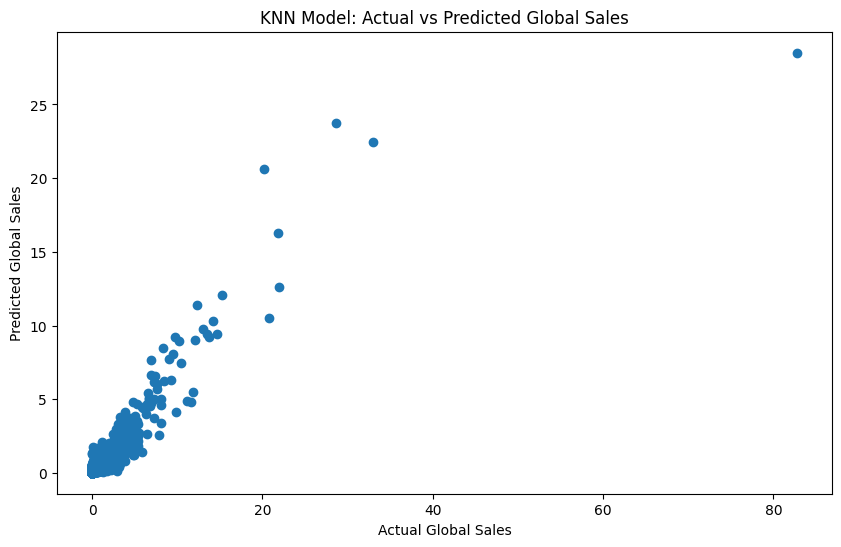

KNN Model Evaluation:
Mean Squared Error: 0.9151089116202945
R-squared: 0.7266118791070907


In [ ]:
# Train the KNN model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Evaluate the KNN model
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Visualize the results for KNN model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn)
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('KNN Model: Actual vs Predicted Global Sales')
plt.show()

# Print evaluation metrics for KNN model
print("KNN Model Evaluation:")
print("Mean Squared Error:", mse_knn)
print("R-squared:", r2_knn)

### Multiple Linear Regression

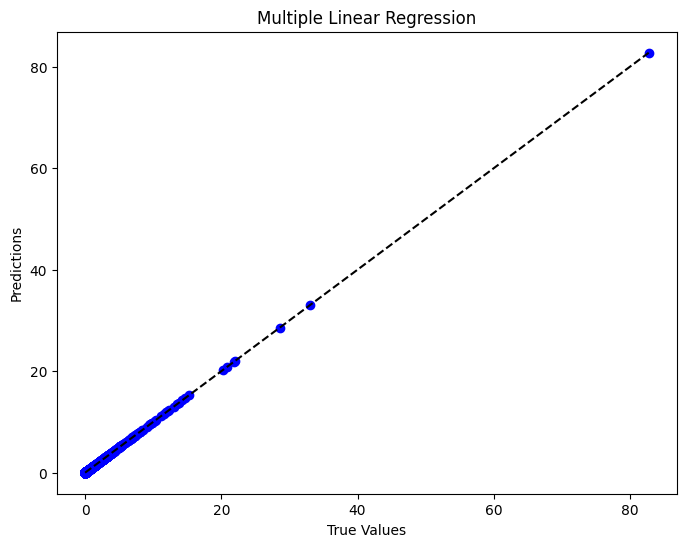

Linear Regression Model Evaluation:
Mean Squared Error: 2.8430641963327776e-05
R-squared: 0.9999915063664189


In [ ]:
# Train the model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Evaluate the model
y_pred_linear = linear_regression.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Multiple Linear Regression')
plt.show()

# Print evaluation metrics
print("Linear Regression Model Evaluation:")
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)

### Decision Tree

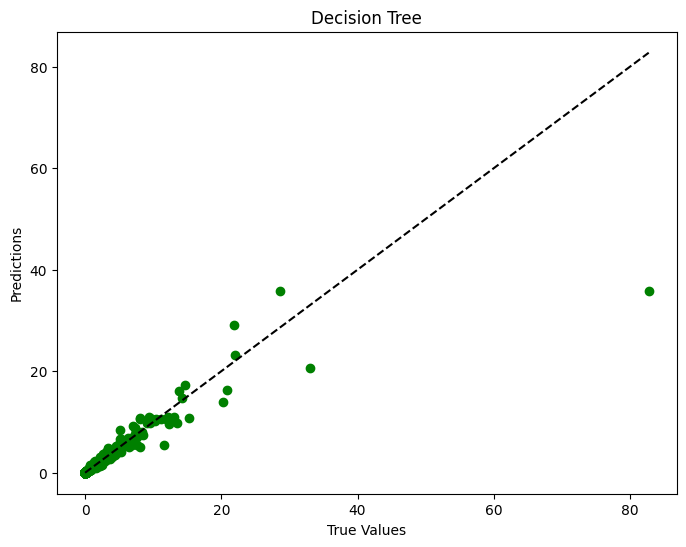

Decision Tree Model Evaluation:
Mean Squared Error: 0.5570112845233223
R-squared: 0.8335932844077009


In [ ]:
# Train the model
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

# Evaluate the model
y_pred_dt = decision_tree.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Decision Tree')
plt.show()

# Print evaluation metrics
print("Decision Tree Model Evaluation:")
print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)

### Random Forest

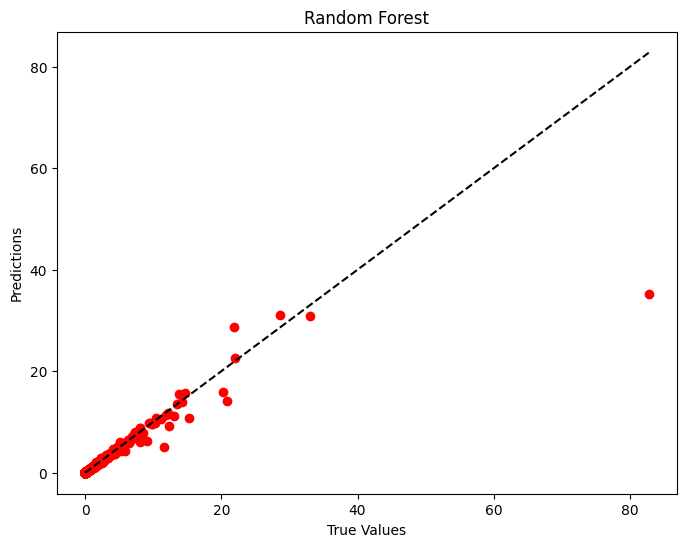

Random Forest Model Evaluation:
Mean Squared Error: 0.5078356728457338
R-squared: 0.8482844625828662


In [ ]:
# Train the model
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = random_forest.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest')
plt.show()

# Print evaluation metrics
print("Random Forest Model Evaluation:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

### Gradient Boosting

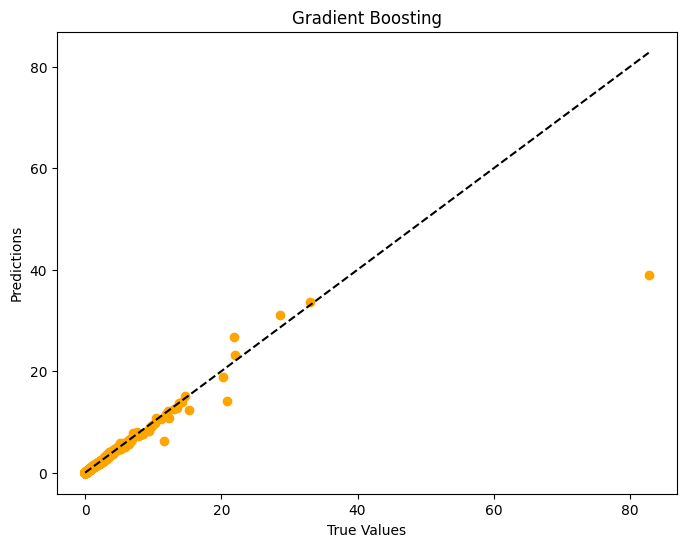

Gradient Boosting Model Evaluation:
Mean Squared Error: 0.42023350919103775
R-squared: 0.8744555451759813


In [ ]:
# Train the model
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)

# Evaluate the model
y_pred_gb = gradient_boosting.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Gradient Boosting')
plt.show()

# Print evaluation metrics
print("Gradient Boosting Model Evaluation:")
print("Mean Squared Error:", mse_gb)
print("R-squared:", r2_gb)


## **Results**

- Each regression model's performance was evaluated using the chosen metrics.
- Model predictions were visualized alongside actual sales figures to gain insights into model behavior.
- The Gradient Boosting Regression model was identified as the top performer based on R-squared scores, demonstrating its superior predictive ability.

Best Model: Multiple Linear Regression with R-squared: 1.0000
Worst Model: KNN with R-squared: 0.7266


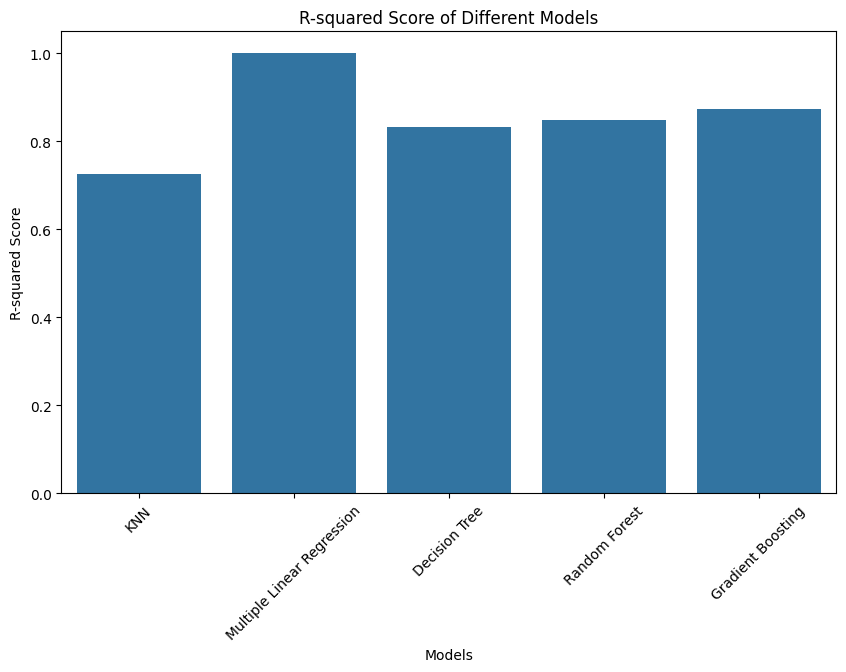

In [ ]:
# Create a DataFrame for results
results_df = pd.DataFrame({
    'Model': ['KNN', 'Multiple Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Mean Squared Error': [mse_knn, mse_linear, mse_dt, mse_rf, mse_gb],
    'R-squared': [r2_knn, r2_linear, r2_dt, r2_rf, r2_gb]
})

# Identify the best and worst models based on R-squared
best_model = results_df.loc[results_df['R-squared'].idxmax()]
worst_model = results_df.loc[results_df['R-squared'].idxmin()]

print(f"Best Model: {best_model['Model']} with R-squared: {best_model['R-squared']:.4f}")
print(f"Worst Model: {worst_model['Model']} with R-squared: {worst_model['R-squared']:.4f}")

# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='R-squared')
plt.title('R-squared Score of Different Models')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45)
plt.show()


# **Conclusion**

This project successfully developed and evaluated machine learning models for predicting video game sales. The Gradient Boosting Regression algorithm emerged as the most effective model for accurate sales predictions. Insights gleaned from this project can be immensely valuable for stakeholders in the gaming industry, enabling well-informed decisions and strategic resource allocation.
